## **<center>D209 NVM2 TASK 2: PREDICTIVE ANALYSIS<center>** 

## Julia Amanda Terzin  
ID:009968680  
Mentor: Linda Howel   
1-385-428-2729    
linda.howell@wgu.edu   
April 12, 2022

### Part I: Research Question

#### A.  Describe the purpose of this data mining report by doing the following:

#### A.1.  Propose one question relevant to a real-world organizational situation that you will answer using one of the following prediction methods:

Using RandomForestRegressor analysis on past patient data, is it possible to identify medical data indicators that can predict the length of stay for a hospitalized patient?

#### A.2. Define one goal of the data analysis. Ensure that your goal is reasonable within the scope of the scenario and is represented in the available data.

The medical data set contains data on 10,000 patients with demographic information, past medical history, medical data from initial hospital admission, hospital charges, and survey results. The primary goal of the analysis is to identify which of the medically-related data, if any, can be used to predict the length of stay for a hospitalized patient. This information would be useful to the hospital for bed management and could decrease patient stay with early intervention to better manage factors that contribute to long stays. This would benefit both the hospital with reduced costs and patients with improved health.

### Part II: Method Justification

#### B.  Explain the reasons for your chosen prediction method from part A1 by doing the following:

#### B.1. Explain how the prediction method you chose analyzes the selected data set. Include expected outcomes.

RandomForestRegressor is a type of supervised learning. It works by producing multiple decision trees from subsets created from the data.  Each one produces an independent output. All of the independent outputs are then aggregated into the best result.  The underlying concept is "the wisdom of crowds wherein a large number of uncorrelated models operating as a committee will outperform any of the individual constituent models." (Raj, 2020)  It is my hope that using this method may reveal insight into the relationship between the medical data and length of stay that has not been apparent in linear regression models.

#### B.2.  Summarize one assumption of the chosen prediction method.

While there are no strict formal assumptions for Random Forest Regression. It is a non-parametric model that does well with skewed and multimodal data and handles outliers and large datasets. (Vishalmendekarhere, 2021) 

#### B.3. List the packages or libraries you have chosen for Python or R, and justify how each item on the list supports the analysis.

I chose Python as my programming language. I am new to the field of data analytics and do not have any programming experience, so I chose to focus on learning a single language for this course. The Numpy and Pandas packages have the needed tools to analyze and manipulate large data frames. There are also countless libraries available to simplify complex tasks. Below is a table with the ones I employed with their application. 

| Package/Library                 | Application                          |
|---------------------------------|--------------------------------------|
| sys                             | Print versions of packages/libraries |
| pandas                          | Data manipulation and analysis       |
| numpy                           | Arrays and mathematical computation  |
| matplotlib.pyplot               | Visualizations                       |
| seaborn                         | Visualizations                       |
| plotnine                        | Visualizations                       |
| **sklearn.preprocessing:**      |                                      |
| LabelEncoder                    | Label encode categorical features    |
| **sklearn.model_selection:**    |                                      |
| train_test_split                | Split data into train and test sets  |
| GridSearchCV                    | Find the best k value for KNN        |
| **sklearn.ensemble:**           |                                      |
| RandomForestRegressor           | Performs the Random Forest analysis  |
| **sklearn.metrics:**            |                                      |
| mean_squared_error              | Computes mean squared error          |
| **feature_engine:**             |                                      |
| OutlierTrimmer                  | Find and drop outliers               |

### Part III: Data Preparation

#### C. Perform data preparation for the chosen data set by doing the following:

#### C.1.  Describe one data preprocessing goal relevant to the prediction method from part A1.

One of the goals of data preprocessing is re-expressing the categorical variables. The binary variables will be label encoded and the others will be one-hot coded with dummy variables. The modeling algorithm requires categorical variables to be separated into dummy variables with a 0 or 1. (Larose, 2019)

#### C.2.  Identify the initial data set variables that you will use to perform the analysis for the classification question from part A1, and classify each variable as continuous or categorical.

|  Name |  Data Type |  Variable Type|Description |  #Unique | Example/Range  |
|:---|:---|:---|:---|---:|---:|
|Information on patient on admission|
|Age|float64|Quantitative/Discrete|Age of patent|72|18-89|
|Gender|object | Categorical /Nominal |Reported gender|3|Female, Male, Nonbinary|
|VitD_levels|float64| Quantitative/Continuous|Lab value for Vitamin D level|9976|9.806483-26.394449|
|Doc_visits  |int64  |Quantitative/Discrete|Primary care doctor's visits to patient during initial admission|9|1-9|
|Full_meals_eaten|int64|Quantitative/Discrete|Total number of full meals eaten during hospitalization. |8|0-7|
|VitD_supp|int64  |Quantitative/Discrete|Number of vitamin D supplements given. Initial verses readmission not specified|6|0-5|
|Patient history recorded in chart|
|Soft_drink| object| Categorical /Binary |3 or more sodas consumed daily|2|No, Yes|
|Initial_admin|object| Categorical /Nominal |Type of initial admission|3| Emergency Admission, Elective Admission, Observation Admission|
|HighBlood|object| Categorical /Binary |Diagnosed with high blood pressure|2|No, Yes|
|Stroke|object| Categorical /Binary |History of stroke|2|No, Yes|
|Complication_risk|object| Categorical /Nominal |Complication risk level recorded in initial patient assessment|3| Low, Medium, High|
|Overweight|float64| Categorical /Binary |Patient is considered overweight based on age, gender, and height |2|No, Yes|
|Arthritis|object| Categorical /Binary |Diagnosed with arthritis|2|No, Yes|
|Diabetes|object|Categorical /Binary |Diagnosed with diabetes|2|No, Yes|
|Hyperlipidemia|object| Categorical /Binary |Diagnosed with hyperlipidemia|2|No, Yes|
|BackPain|object| Categorical /Binary |Diagnosed with chronic back pain|2|No, Yes|
|Anxiety|float64| Categorical /Binary |Diagnosed with anxiety disorder|2|No, Yes|
|Allergic_rhinitis|object| Categorical /Binary |Diagnosed with allergic rhinitis|2|No, Yes|
|Reflux_esophagitis|object| Categorical /Binary |Diagnosed with reflux esophagitis|2|No, Yes|
|Asthma|object| Categorical /Binary |Diagnosed with asthma|2|No, Yes|
|Billing information from chart|
|Services|object| Catigorical/Nominal |Services received during hospitalization. Initial verses readmission not specified|4|blood work, intravenous, CT scan, MRI|
|Initial_days|float64| Quantitative/Continuous|Length of initial hospital stay|9997| 1.001981- 71.981490|

#### C.3.  Explain each of the steps used to prepare the data for the analysis. Identify the code segment for each step.

1.	Import packages
2.	Define functions to be used
3.	Load data
4.	Make a backup copy
5.	Examine the data set for shape, column name/count, and data types
6.	Drop columns not applicable to the research question using the definitions provided in the data dictionary
7.	Evaluate the dataset for missing values and duplicate rows
8.	For each variable:  
a. Evaluate distribution using .describe() and visualizations   
b. Examine categorical unique values for improper entries   
c. Identify outliers, treat if needed using feature-engine OutlierTrimmer
9.	Bivariate visualizations of target and independent variables looking at relationship with target
10.	Re-express categorical variables to numeric needed for the analysis

##### 1. Import Packages

In [1]:
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotnine as p9
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error as MSE

from feature_engine.outliers import OutlierTrimmer

In [2]:
#Environment versions
print('Python version:   ' + sys.version)
print('Pandas version:   ' + pd.__version__)
print('Numpy version:    ' + np.__version__)

Python version:   3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)]
Pandas version:   1.2.5
Numpy version:    1.20.1


In [3]:
warnings.filterwarnings('ignore')

##### 2. Define Functions

In [4]:
#Value Counts for categorical variables
def val_count(df):  
    cat_cols = df.select_dtypes('object').columns
    for col in cat_cols:
        print(df[col].value_counts())
        print()
    return

In [5]:
#function to label encode variables
def label(df):
    cat_cols = df.select_dtypes('object').columns
    labelencoder = LabelEncoder()
    for col in cat_cols:
        df[col] = labelencoder.fit_transform(df[col])
    return

In [6]:
#Function to plot histograms of categorical variables
#https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
def cat_hist(df): 
    # List of categorical columns
    cat_cols = df.select_dtypes('object').columns
    
    for col in cat_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (4, 2))        
            sns.countplot(x=df[col], 
                          data=df, 
                          palette="Paired",
                          order = df[col].value_counts().index)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        else:
            sns.displot(df, x=df[col])
    return

In [7]:
#Function to plot histograms and boxplots of integer variables
#https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
def int_hist(df):  
    # List of integer columns
    int_cols = df.select_dtypes('int64').columns
    
    for col in int_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
        
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12: 
            plt.figure(figsize = (8, 6))
            sns.countplot(x=df[col], 
                    data=df, 
                    palette="Paired")
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
            sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
            
        else:
            plt.figure(figsize = (6, 4))
            sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
            sns.displot(df, x=df[col])                       
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(column_name, fontsize = 15)
            plt.xticks(rotation=20)
            plt.ylabel("Frequency",fontsize = 15)
            plt.show();
        
    return

In [8]:
#Function to plot distribution and boxplots of float variables
#https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3
def float_box(df):
    # List of float columns
    num_cols = df.select_dtypes('float').columns
    
    for col in num_cols:
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Distribution of ' + column_name
              
        plt.figure(figsize = (6, 4))        
        sns.boxplot(x=df[col], 
                    data=df, 
                    palette="Paired")
        sns.displot(df, x=df[col])
        plt.title(title, fontsize = 18, pad = 12)
        plt.xlabel(column_name, fontsize = 15)
        plt.xticks(rotation=20)
        plt.ylabel("Frequency",fontsize = 15)
        plt.show();
        
    return

In [9]:
# Funtion for finding upper and lower outliers
#Returns df with outliers dropped
def out(df): 
    outliers = df.copy(deep=True) 
    # List of numbers columns
    num_cols = df.select_dtypes(include='number').columns
    
    #Find upper and lower outliers
    for col in num_cols:
        capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, 
                       variables=[col])
        capper.fit(df)
        upper = capper.right_tail_caps_
        lower = capper.left_tail_caps_       
              
        print(capper.right_tail_caps_)
        print(capper.left_tail_caps_)
        df = capper.transform(df)
    capped = df.copy(deep=True)  
        
    return capped

In [10]:
#Bivariate visualizations for numeric variables
def bi_vis_cat(df):  
            
    x = df.iloc[:,:-1]
    # List of numeric columns 
    num_cols = x.select_dtypes('object').columns
   
    #iterate over numeric columns
    for col in num_cols:
           
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Initial_days vs ' + column_name
        # Unique values <= 12 to avoid overcrowding
        #if len(df[col].value_counts())<=12:
        # Subplot 1
        sns.catplot(x=col, y="Initial_days", kind="box", data=df)
        print(p9.ggplot(df)+ p9.aes(x='Initial_days', fill=col) + p9.geom_density(alpha=0.5))
      

In [11]:
#Bivariate visualizations for numeric variables
def bi_vis_num(df):  
            
    x = df.iloc[:,:-1]
    # List of numeric columns 
    num_cols = x.select_dtypes(include='number').columns
   
    #iterate over numeric columns
    for col in num_cols:
           
        # Formatting
        column_name = col.title().replace('_', ' ')
        title= 'Initial_days vs ' + column_name
        # Unique values <= 12 to avoid overcrowding
        if len(df[col].value_counts())<=12:
            # Subplot 1
            c=sns.catplot(x=col, y="Initial_days", kind="box", data=df)
            plt.title(title, fontsize = 18, pad = 12)
            plt.xlabel(col, fontsize = 16)
            plt.xticks(rotation=20)
            plt.ylabel('Initial_days',fontsize = 20)
            plt.show()
            
        else:
            # Subplot 1
            ax = sns.jointplot(x=col, y="Initial_days", data=df, kind="reg")
            plt.xlabel(col, fontsize = 22)
            plt.xticks(rotation=0)
            plt.ylabel('Initial_days',fontsize = 20)
            plt.show()
            
        
    return

##### 3. Load data 

In [12]:
# Load data
df = pd.read_csv('c:/Users/jater/Downloads/D205/medical_clean2.csv')

##### 4. Backup

In [13]:
#Back up copy of origional data
df_copy = df.copy(deep=True)

##### 5. Examine data

In [14]:
df.shape

(10000, 50)

In [15]:
df.info() #Column names, data types, non-nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [16]:
pd.set_option('display.max_columns', None)
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


##### 6. Drop columns

In [17]:
#Drop unneeded columns. Contain patient identifiers, location/area information, and survey answers not relevant.  
#Job, marital, Income, and children were not specific to patient, listed as patient or primary insurance holder.
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'Zip',  'County', 'Lat', 'Lng',
              'Population', 'Area', 'TimeZone', 'Job', 'Children', 'ReAdmis',  'Income', 'Marital', 'Additional_charges', 'TotalCharge', 
               'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8',], axis=1)

In [18]:
df.head()

,Age,Gender,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days
0,53,Male,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770
1,51,Female,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562
2,53,Female,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177
3,78,Male,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879
4,22,Female,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807


##### 7. Detect duplicate rows and missing values

In [19]:
df.duplicated().sum() #No duplicated rows

0

In [20]:
df.isnull().sum() #No missing values

Age                   0
Gender                0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
dtype: int64

##### 8. Examine distribution, identify outliers, look at unique values for improperly formatted input

In [21]:
df.describe(exclude='number') #Non-numeric values- count, unique, most frequent

,Gender,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services
count,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
unique,3,2,3,2,2,3,2,2,2,2,2,2,2,2,2,4
top,Female,No,Emergency Admission,No,No,Medium,Yes,No,No,No,No,No,No,No,No,Blood Work
freq,5018,7425,5060,5910,8007,4517,7094,6426,7262,6628,5886,6785,6059,5865,7107,5265


In [22]:
#Evaluate value counts and unique values of categorical variables.
#Look for invalid values that don't match the data dictionary  
val_count(df)

Female       5018
Male         4768
Nonbinary     214
Name: Gender, dtype: int64

No     7425
Yes    2575
Name: Soft_drink, dtype: int64

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

No     5910
Yes    4090
Name: HighBlood, dtype: int64

No     8007
Yes    1993
Name: Stroke, dtype: int64

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

Yes    7094
No     2906
Name: Overweight, dtype: int64

No     6426
Yes    3574
Name: Arthritis, dtype: int64

No     7262
Yes    2738
Name: Diabetes, dtype: int64

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

No     5886
Yes    4114
Name: BackPain, dtype: int64

No     6785
Yes    3215
Name: Anxiety, dtype: int64

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

No     5865
Yes    4135
Name: Reflux_esophagitis, dtype: int64

No     7107
Yes    2893
Name: Asthma, dtype: int64

Blood Work     5265
Intravenous    

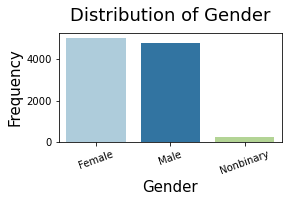

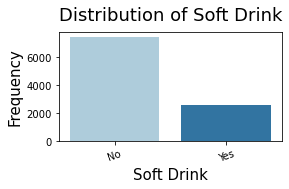

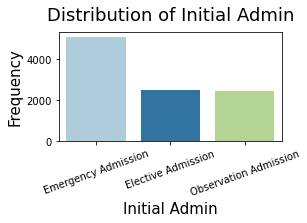

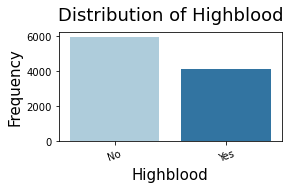

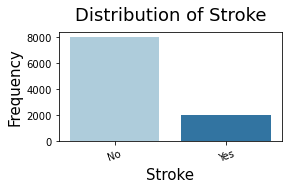

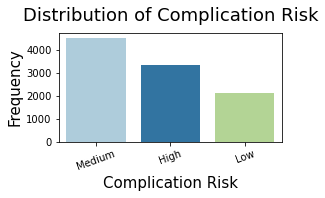

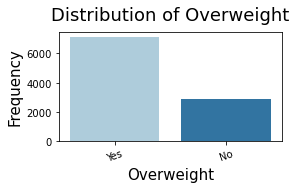

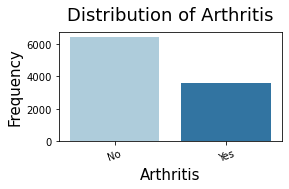

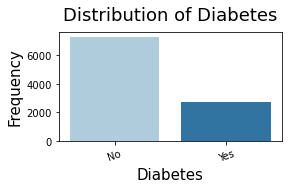

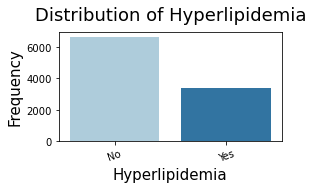

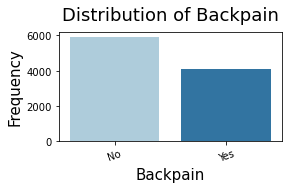

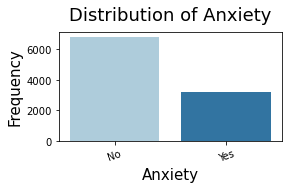

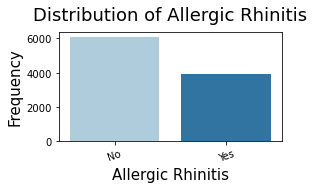

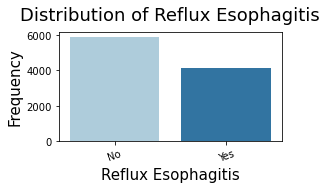

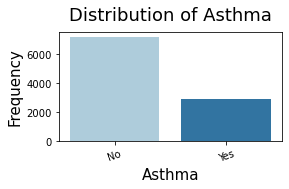

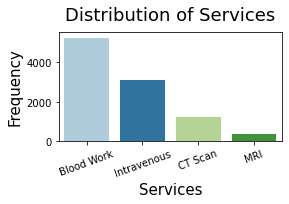

In [23]:
#Univariate visualizations of categorical variables
cat_hist(df)

In [24]:
df.describe() #Numeric values- count, min, max, mean

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,17.964262,5.012200,1.001400,0.398900,34.455299
std,20.638538,2.017231,1.045734,1.008117,0.628505,26.309341
min,18.000000,9.806483,1.000000,0.000000,0.000000,1.001981
25%,36.000000,16.626439,4.000000,0.000000,0.000000,7.896215
50%,53.000000,17.951122,5.000000,1.000000,0.000000,35.836244
75%,71.000000,19.347963,6.000000,2.000000,1.000000,61.161020
max,89.000000,26.394449,9.000000,7.000000,5.000000,71.981490


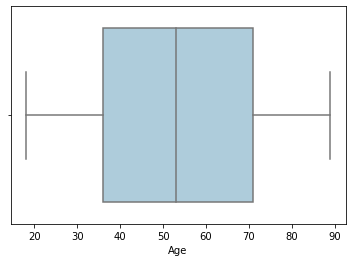

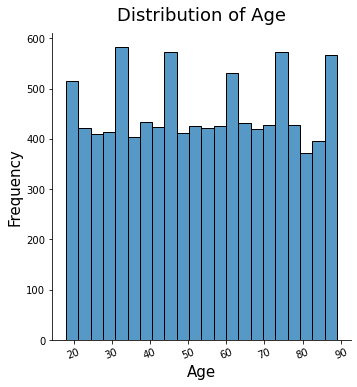

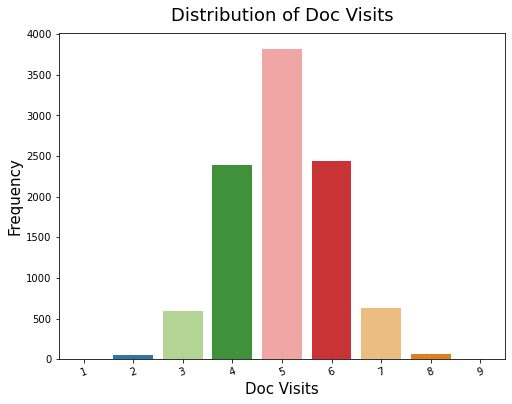

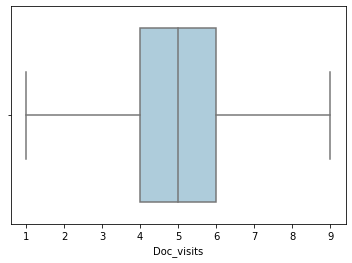

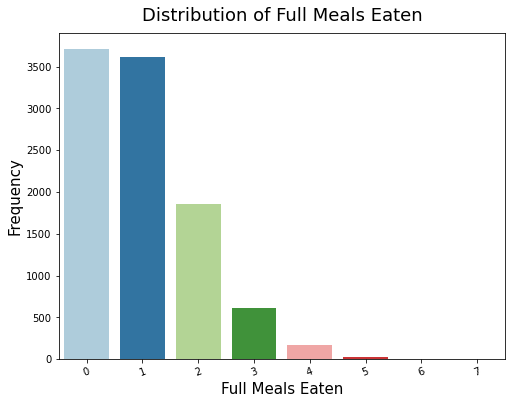

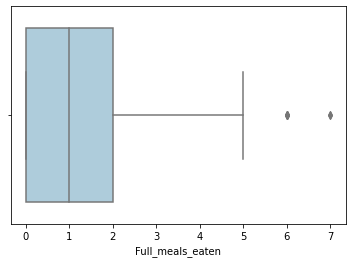

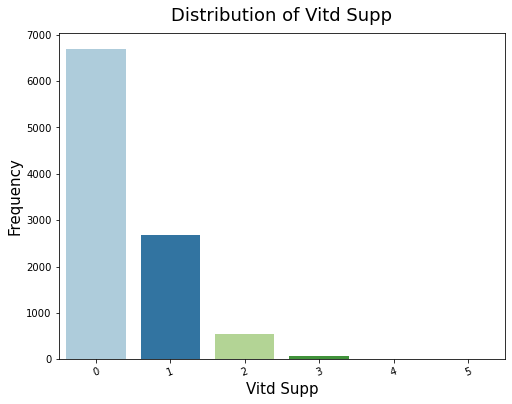

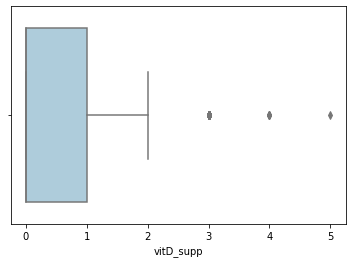

In [25]:
#Univariate visualizations of interger variables
int_hist(df)

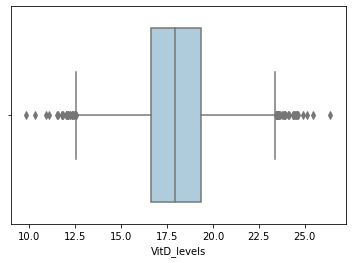

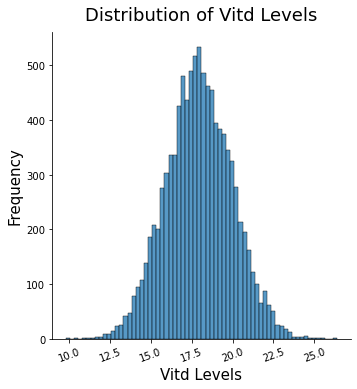

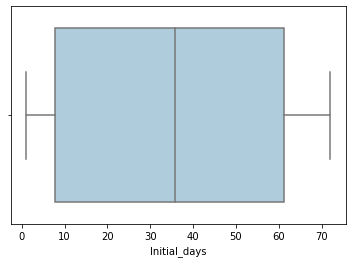

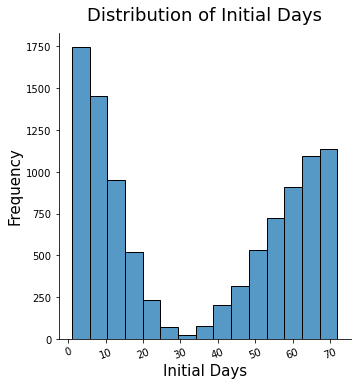

In [26]:
#Univariate visualizations of float variables
float_box(df)

In [27]:
#Find upper and lower limits for outliers and return df with outlier rows
#Return df with outliners dropped as capped
capped= out(df)

{'Age': 123.5}
{'Age': -16.5}
{'VitD_levels': 23.430248331250006}
{'VitD_levels': 12.544152781249997}
{'Doc_visits': 9.0}
{'Doc_visits': 1.0}
{'Full_meals_eaten': 5.0}
{'Full_meals_eaten': -3.0}
{'vitD_supp': 2.5}
{'vitD_supp': -1.5}
{'Initial_days': 141.12600662674998}
{'Initial_days': -72.01783771125}


In [28]:
# df without outliers
capped.describe()

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days
count,9863.000000,9863.000000,9863.000000,9863.000000,9863.000000,9863.000000
mean,53.497212,17.959948,5.012978,0.998175,0.379398,34.487608
std,20.657195,1.966096,1.045620,0.997663,0.586841,26.319469
min,18.000000,12.546070,1.000000,0.000000,0.000000,1.001981
25%,35.000000,16.634247,4.000000,0.000000,0.000000,7.911104
50%,53.000000,17.946420,5.000000,1.000000,0.000000,36.221460
75%,71.000000,19.335790,6.000000,2.000000,1.000000,61.197065
max,89.000000,23.363658,9.000000,5.000000,2.000000,71.981490


In [29]:
#Examine rows dropped for outliers
outliers = df[~df.index.isin(capped.index)]
outliers

,Age,Gender,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days
22,31,Female,24.565463,5,0,2,No,Emergency Admission,Yes,No,High,No,Yes,No,Yes,No,No,No,Yes,No,Intravenous,3.798955
62,75,Female,16.188101,3,2,3,No,Emergency Admission,No,No,Low,No,No,No,Yes,Yes,Yes,Yes,No,No,Intravenous,12.814131
63,63,Female,16.756990,5,1,3,Yes,Emergency Admission,No,No,Medium,Yes,No,No,No,Yes,Yes,No,Yes,No,Blood Work,23.037219
64,57,Female,23.662948,5,0,0,No,Elective Admission,No,No,Medium,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,CT Scan,1.462114
206,29,Female,21.131385,5,1,3,No,Emergency Admission,No,No,Low,Yes,No,No,No,No,Yes,No,No,No,CT Scan,5.803088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9787,79,Female,12.509160,5,0,1,No,Emergency Admission,Yes,No,Low,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Yes,Intravenous,51.534060
9790,46,Female,18.499340,4,0,3,Yes,Observation Admission,Yes,No,Low,Yes,No,No,No,Yes,No,Yes,No,No,Blood Work,58.818400
9908,73,Female,19.297160,5,0,3,No,Elective Admission,No,No,Medium,Yes,No,Yes,No,No,No,Yes,Yes,No,Blood Work,48.006500
9982,47,Female,16.015330,5,0,3,No,Emergency Admission,Yes,No,High,Yes,No,No,Yes,Yes,No,No,No,No,Intravenous,59.408970


Outliers will be kept as values are reasonable per the data dictionary and Decision trees are not sensitive to outliers
(Kotu, Vijay, 2019)

##### 9. Bivariate visualizations of target and independent variables

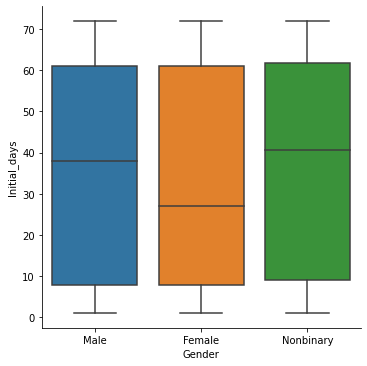

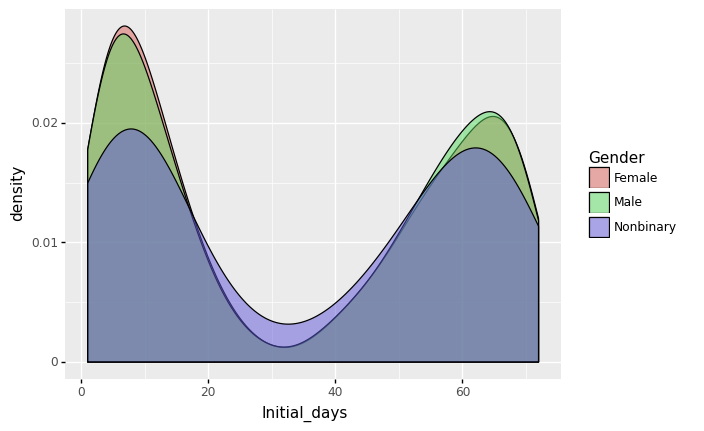

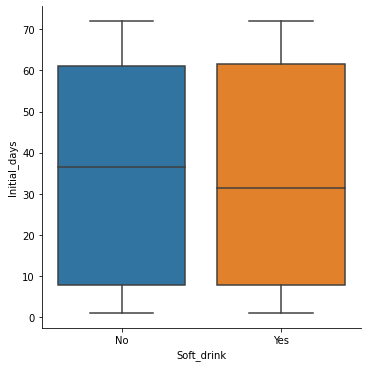

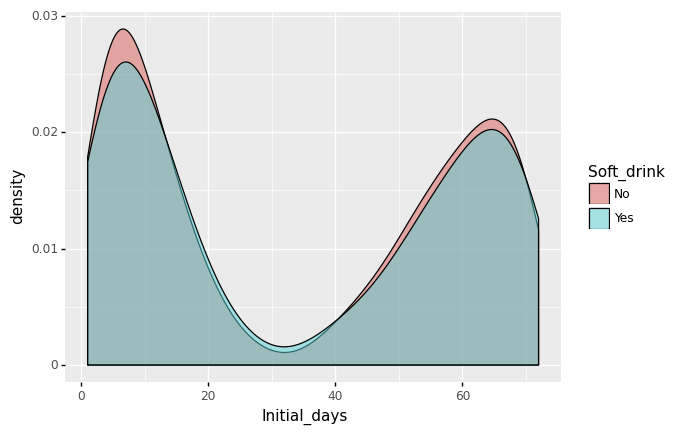

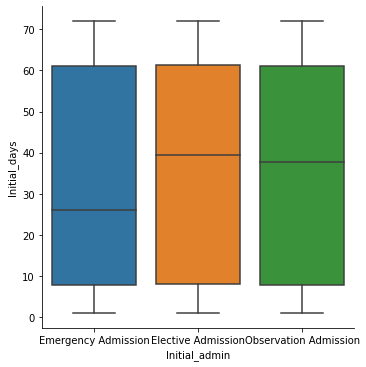

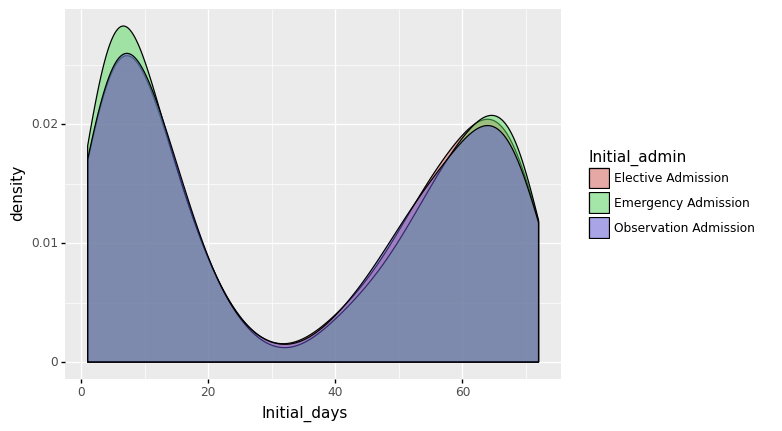

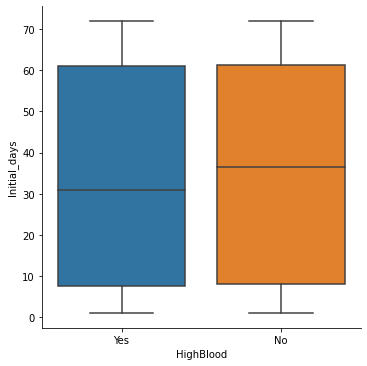

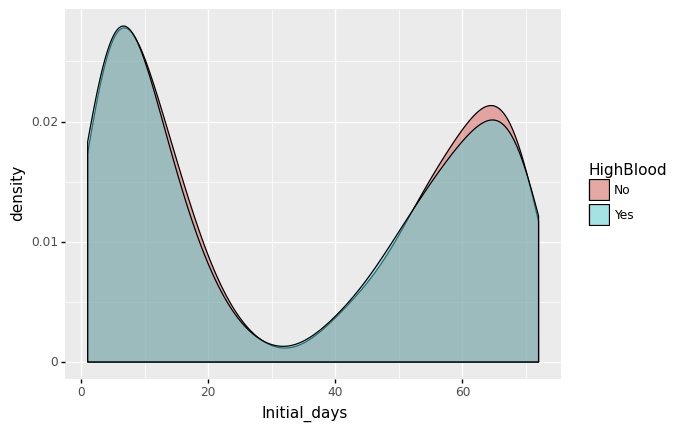

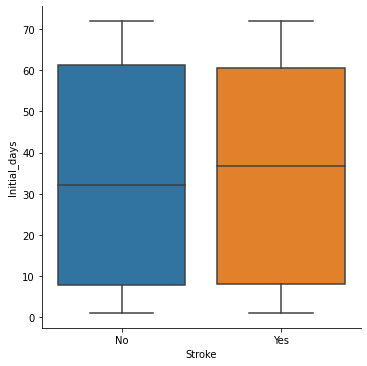

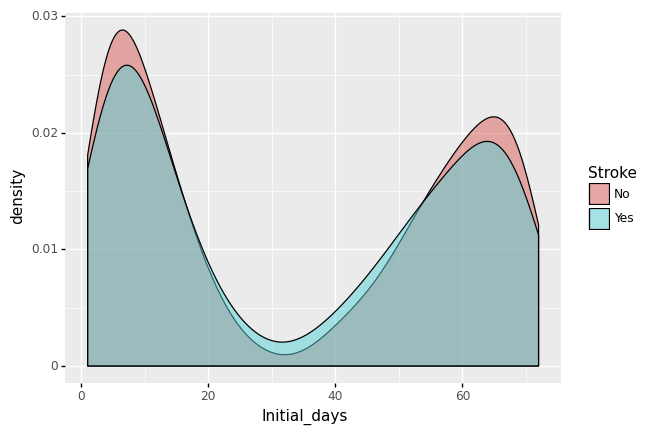

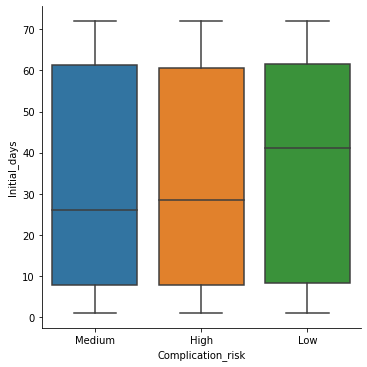

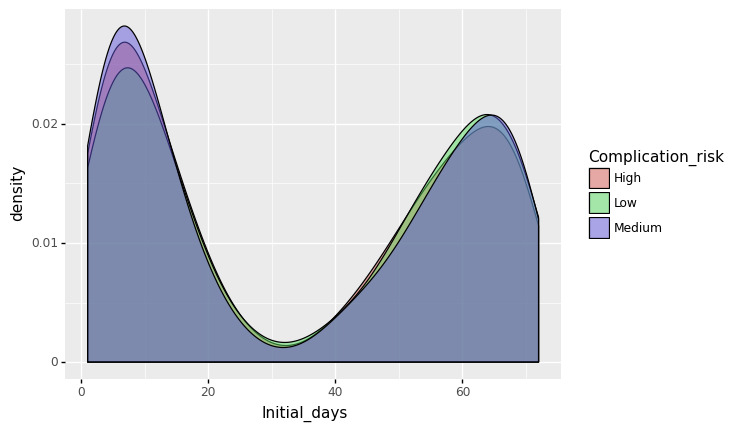

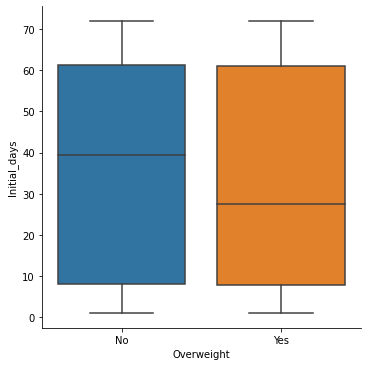

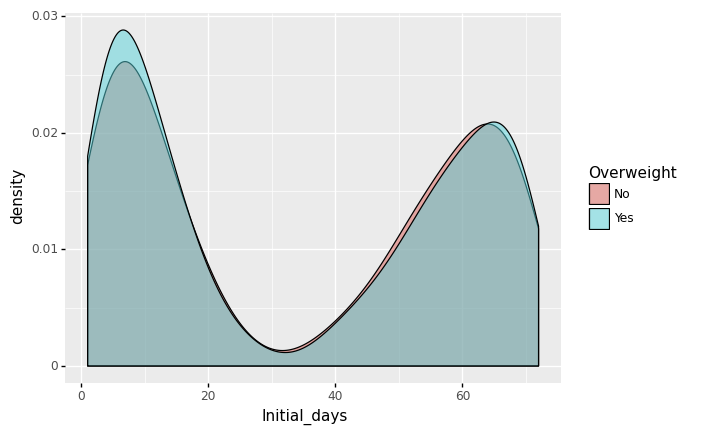

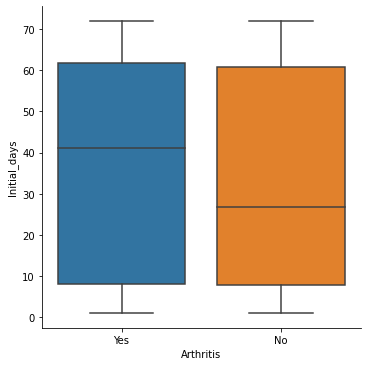

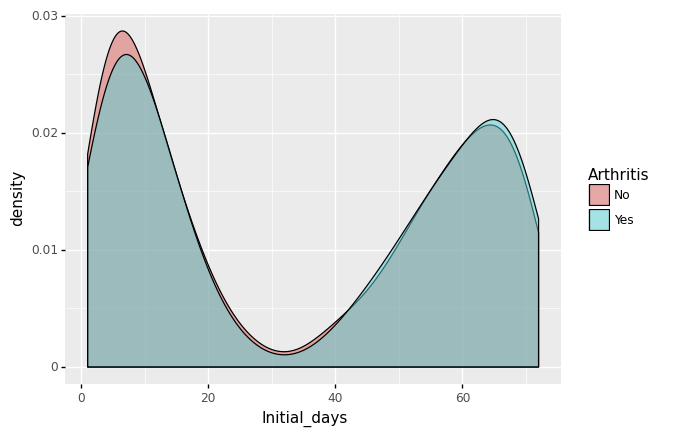

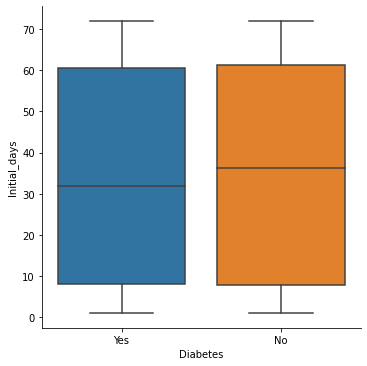

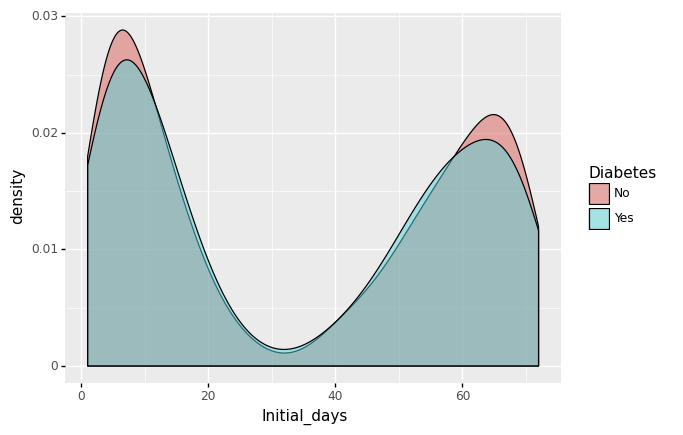

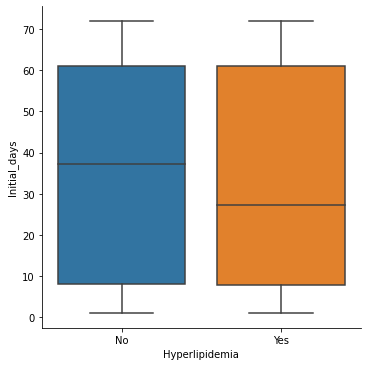

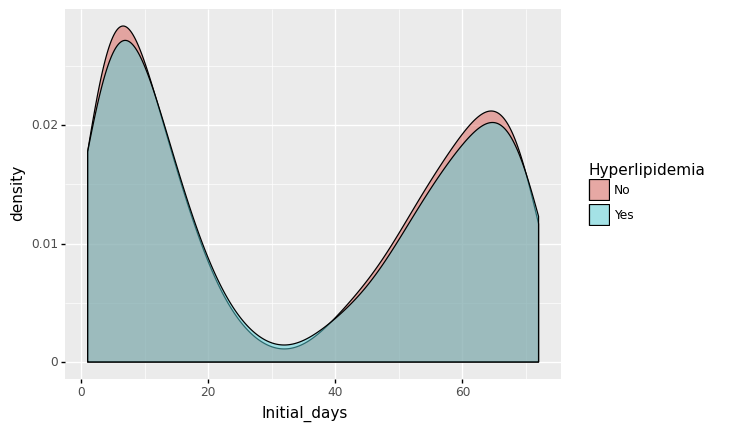

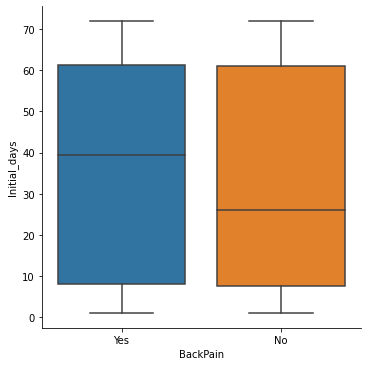

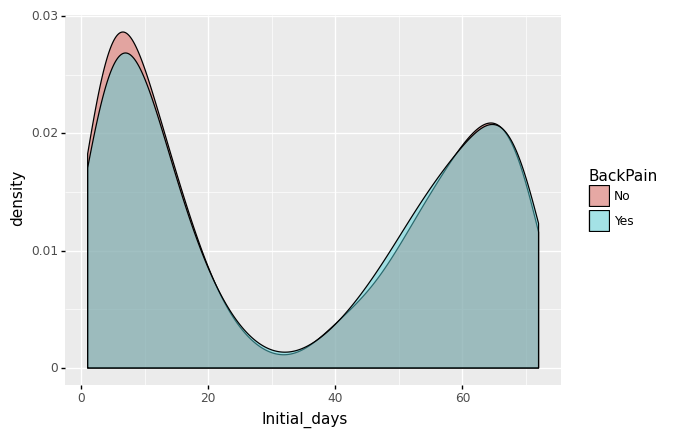

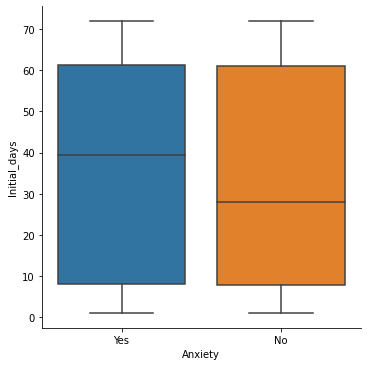

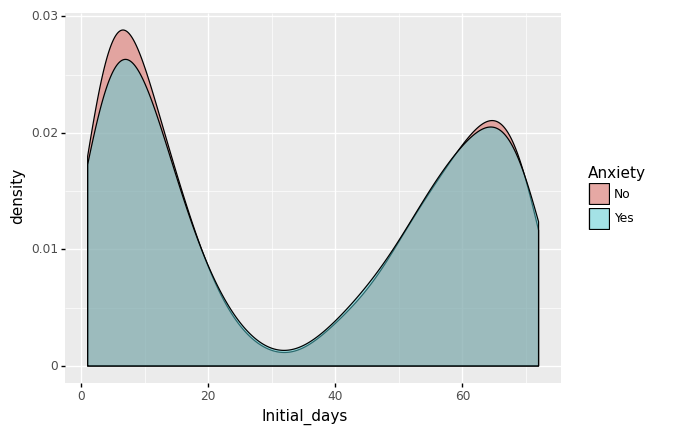

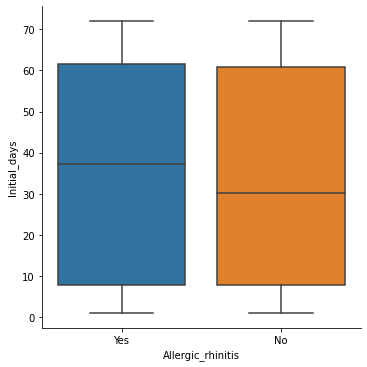

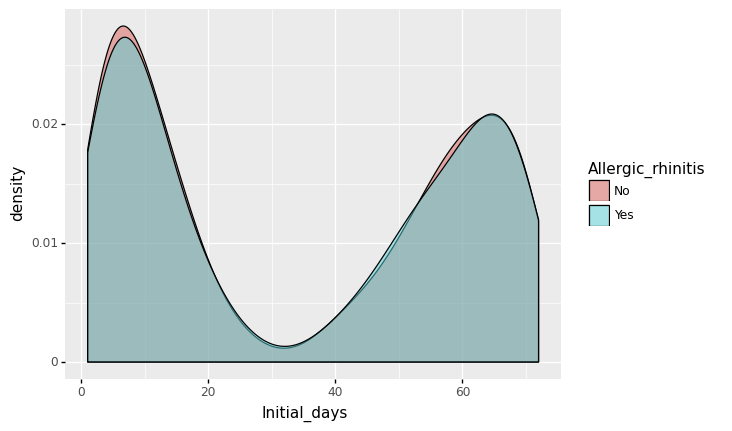

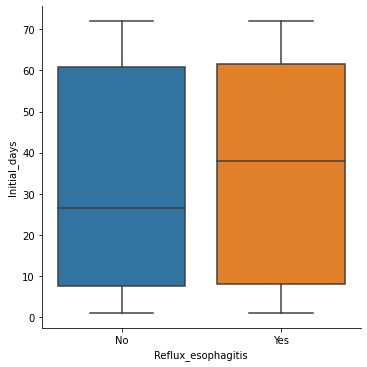

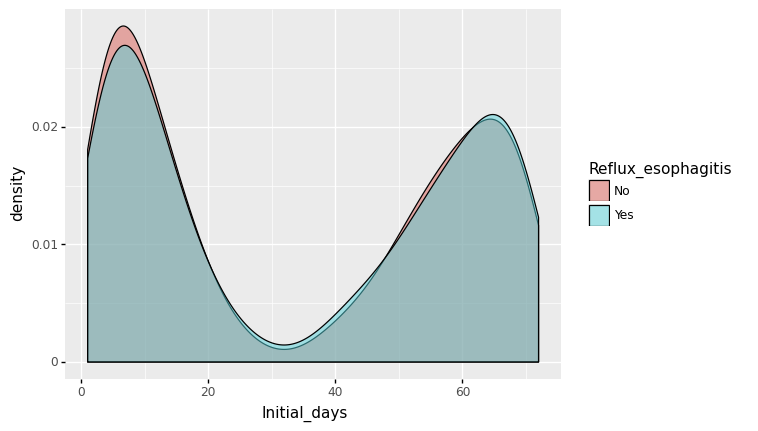

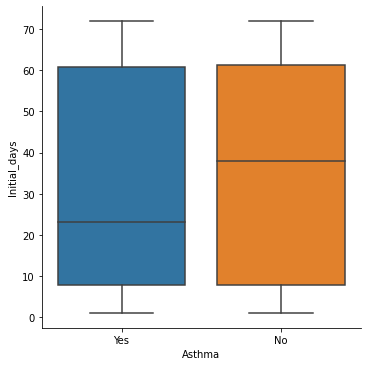

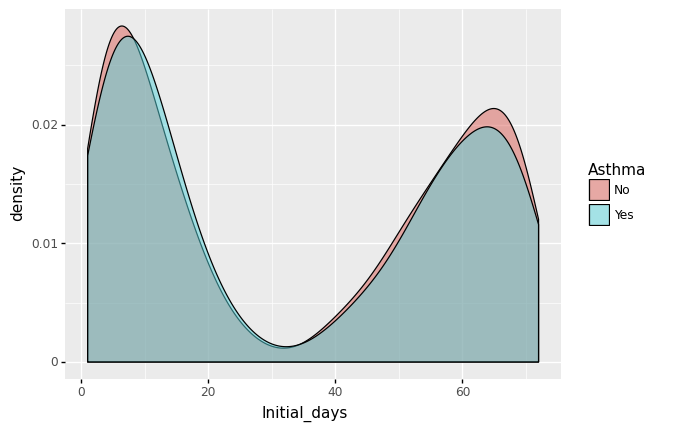

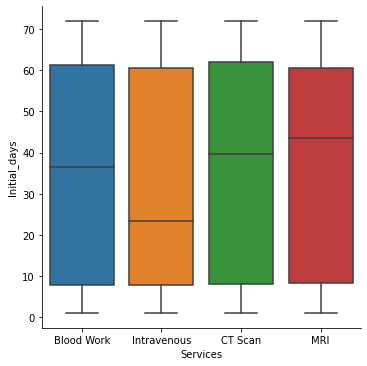

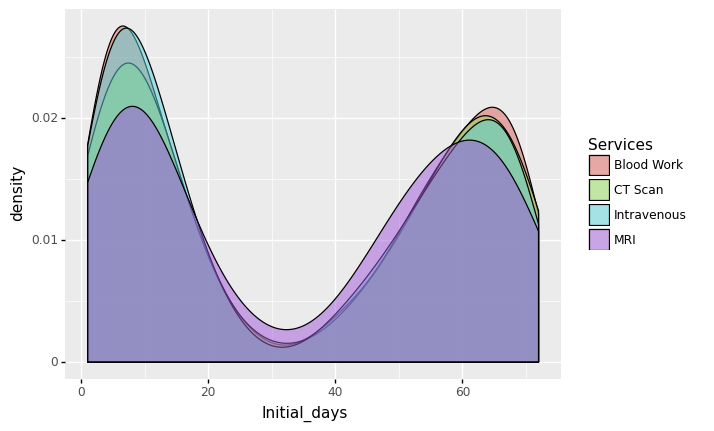

In [30]:
# Visualize bivariate graphs of categorical independent variables vs dependent variable
bi_vis_cat(df)

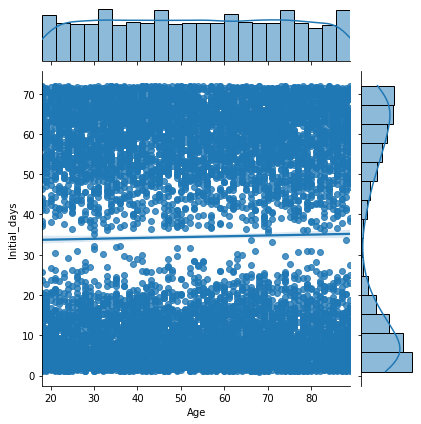

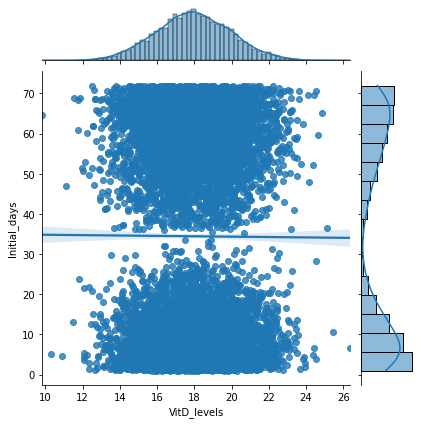

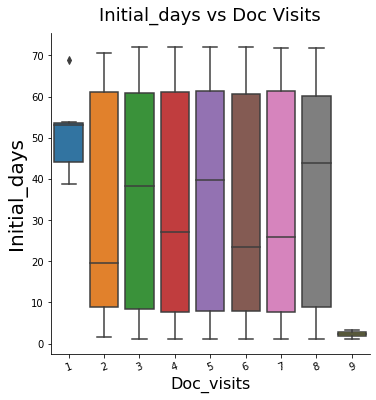

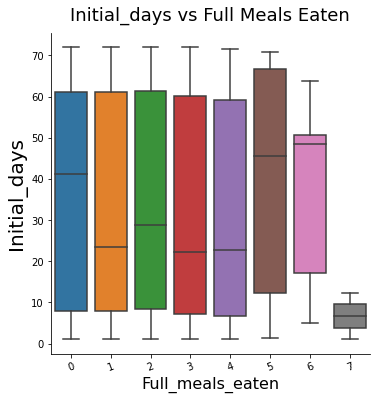

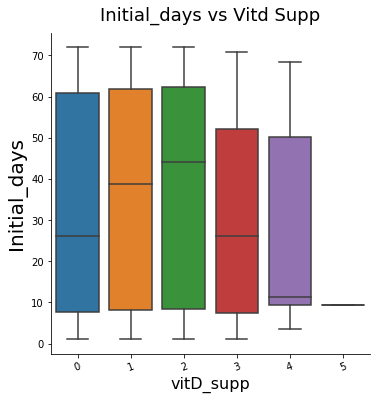

In [31]:
# Visualize bivariate graphs of numeric independent variables vs dependent variable
bi_vis_num(df)

##### 10. Re-express categorical variables to numeric

In [32]:
#Create set for dummies
data = df.copy(deep=True)

In [33]:
data.head()

,Age,Gender,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days
0,53,Male,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770
1,51,Female,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562
2,53,Female,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177
3,78,Male,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879
4,22,Female,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807


In [34]:
#Re-express categorical variables
binary_cols = ['Soft_drink', 'HighBlood', 'Stroke', 'Arthritis', 'Diabetes','Hyperlipidemia', 'BackPain', 
               'Anxiety', 'Allergic_rhinitis','Overweight', 'Reflux_esophagitis', 'Asthma']
categ_cols = ['Gender', 'Complication_risk','Initial_admin', 'Services']

#Yes/no variables
labelencoder = LabelEncoder()
for col in binary_cols:
    data[col] = labelencoder.fit_transform(data[col])

#Variables with >2 values
for column in categ_cols:
    tempdf = pd.get_dummies(data[column], prefix=column)
    data = pd.merge(
    left=data,
    right=tempdf,
    left_index=True,
    right_index=True,
    )
    data = data.drop(columns=column)
    #Move ReAdmis to the last column
    new_cols = [column for column in data.columns if column != 'Initial_days'] + ['Initial_days']
    data = data[new_cols]

In [35]:
data.head()

,Age,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Gender_Female,Gender_Male,Gender_Nonbinary,Complication_risk_High,Complication_risk_Low,Complication_risk_Medium,Initial_admin_Elective Admission,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Services_Blood Work,Services_CT Scan,Services_Intravenous,Services_MRI,Initial_days
0,53,19.141466,6,0,0,0,1,0,0,1,1,0,1,1,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,10.585770
1,51,18.940352,4,2,1,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,15.129562
2,53,18.057507,4,1,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,4.772177
3,78,16.576858,4,1,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,1.714879
4,22,17.439069,5,0,2,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1.254807


#### C.4.  Provide a copy of the cleaned data set.

In [36]:
# Final data set
data.to_csv('D209Task2clean.csv')

### Part IV: Analysis

#### D.  Perform the data analysis and report on the results by doing the following:

#### D.1.  Split the data into training and test data sets and provide the file(s).

In [37]:
# Split data into train and test
X = data.iloc[:,:-1]
y = data['Initial_days']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,  random_state=101)

In [38]:
X_train.to_csv('D209Task2_X_train.csv')
X_test.to_csv('D209Task2_X_test.csv')
y_train.to_csv('D209Task2_y_train.csv')
y_test.to_csv('D209Task2_y_test.csv')

#### D.2.  Describe the analysis technique you used to appropriately analyze the data. Include screenshots of the intermediate calculations you performed.

After preprocessing the data and splitting it into a train and test set, the next step was to create an instantiate of the RandomForestRegressor.  GridSearchCV was used on the training set to find optimal settings for the hyperparameters n-estimators, max-depth, min_samples_leaf, and max_features.  Once the best parameters were computed, predictions were made using the test set. 
("Tuning a CART's Hyperparameters | Python," n.d.) 

#### D.3.  Provide the code used to perform the prediction analysis from part D2.

In [39]:
# Instantiate a random forests regressor 'rf'
rf = RandomForestRegressor(random_state= 1)

In [40]:
# Define a grid of hyperparameter 'params_rf' 
#https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/model-tuning?ex=1
params_rf = { 'n_estimators': [10, 20, 30, 40, 50, 100, 200, 300, 400, 500], 'max_depth': [2, 4, 6, 8, 10, 12, 14], 'min_samples_leaf': [0.1, 0.2], 'max_features': ['log2' , 'sqrt'] } 
# Instantiate 'grid_rf' 
grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=10, scoring='neg_mean_squared_error' , verbose=1, n_jobs=-1)

# Fit 'grid_rf' to the training set 
grid_rf.fit(X_train, y_train)

# Extract the best hyperparameters from 'grid_rf' 
best_hyperparams = grid_rf.best_params_
print('Best hyperparameters:\n' , best_hyperparams)

Fitting 10 folds for each of 280 candidates, totalling 2800 fits
Best hyperparameters:
 {'max_depth': 2, 'max_features': 'log2', 'min_samples_leaf': 0.1, 'n_estimators': 30}


In [41]:
# Extract the best model from 'grid_rf'
#https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/model-tuning?ex=1
best_model = grid_rf.best_estimator_
# Predict the test set labels 
y_pred = best_model.predict(X_test)
# Evaluate the test set MSE
mse_test = MSE(y_test, y_pred)
# Evaluate the test set RMSE 
rmse_test = MSE(y_test, y_pred)**(1/2)
# Print the test set MSE 
print('Test set MSE of rf: {:.2f}' .format(mse_test))
# Print the test set RMSE 
print('Test set RMSE of rf: {:.2f}' .format(rmse_test))

Test set MSE of rf: 700.51
Test set RMSE of rf: 26.47


In [42]:
# Combine into a dataframe for closer evaluation
df_y_pred = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred, 'y_test-y_pred': (y_test-y_pred)})

In [43]:
# Compare statistics of y_pred to y_test
df_y_pred.describe()

,y_test,y_pred,y_test-y_pred
count,2000.000000,2000.000000,2000.000000
mean,34.747458,34.489918,0.257540
std,26.481114,0.352384,26.472427
min,1.001981,33.526433,-34.322997
25%,7.798628,34.230632,-26.645997
50%,37.321510,34.480188,2.575948
75%,61.752382,34.720244,27.201123
max,71.981490,35.492399,37.980629


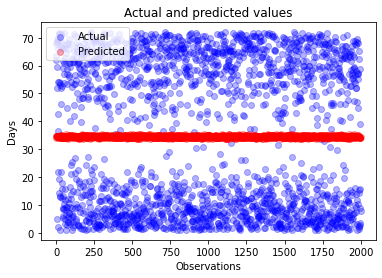

In [44]:
# Plot of y_test vs y_pred
#https://www.mikulskibartosz.name/how-to-visualise-prediction-errors/
_, ax = plt.subplots()

ax.scatter(x = range(0, y_test.size), y=y_test, c = 'blue', label = 'Actual', alpha = 0.3)
ax.scatter(x = range(0, y_pred.size), y=y_pred, c = 'red', label = 'Predicted', alpha = 0.3)

plt.title('Actual and predicted values')
plt.xlabel('Observations')
plt.ylabel('Days')
plt.legend()
plt.show()

### Part V: Data Summary and Implications

#### E.1.   Explain the accuracy and the mean squared error (MSE) of your prediction model.

The MSE of the model is 700.51. Computing the RMSE, 26.47 days, from the MSE gives a more useful statistic as it is in the unit of the predicted variable.  Further examination of the predictions reveals that the predictions are no better than just using the mean of the y_test set, 34.75. Predicted values only range from 33.53 to 35.50 with little variation from patient to patient.

#### E.2.  Discuss the results and implications of your prediction analysis.

The results show that there is little predictive value in the factors chosen for the regression, therefore this model has no value in predicting the length of stay for an admitted patient with the available medical data.

#### E.3.  Discuss one limitation of your data analysis.

None of the underlying comorbidities that one would intuitively think would be important in predicting the length of stay of a hospitalized patient had any predictive value.  It would be helpful to discuss this further with the stakeholders to learn more about the diagnostic criteria used in the inclusion of the associated diagnoses of the patients and what quality controls on the accuracy of the past medical history they maintain.  One of the downsides to the Electronic Medical Record (EMR), is that the problem lists are frequently not appropriately updated with each encounter. For example, a patient found that he had the diagnosis of coronary heart disease (CAD) on his chart. When he inquired if he indeed had CAD, his doctor stated no.  It was there because the doctor had to use that diagnosis code to order a stress test to medically clear him for his hip surgery. The result of the test was negative. (Smith, 2017)

#### E.4.  Recommend a course of action for the real-world organizational situation from part A1 based on your results and implications discussed in part E2.

I would not recommend that this model be used for predicting the length of stay.   As mentioned above, the data does not have any predictive value.  A more appropriate model could be created with more insightful data. I would recommend to stakeholders that quantifying risk factors more precisely would help project length of stay more accurately. For instance, quantifying diabetes with tools such as the Diabetes Severity Score (DISSCO) instead of a simple yes or no would be more informative. (Zghebi, 2020) I would also recommend policies and procedures to educate medical staff on the importance of accurate medical records and regular quality reviews for compliance. (AHIMA, 2013)

### Part VI: Demonstration

#### G.  Provide a Panopto video recording that includes all of the following elements:

https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=43317271-a632-4ff9-9f7c-ae750119df45

#### H.  List the web sources used to acquire data or segments of third-party code to support the application. Ensure the web sources are reliable.

https://towardsdatascience.com/a-function-that-makes-your-initial-eda-a-breeze-8e9549d69fb3      

https://stackoverflow.com/questions/58228837/best-way-to-move-a-column-in-pandas-dataframe-to-last-column-in-large-dataframe

https://www.mikulskibartosz.name/how-to-visualise-prediction-errors/

#### I.	Acknowledge sources, using in-text citations and references, for content that is quoted, paraphrased, or summarized.

AHIMA Work Group. 2013. "Integrity of the Healthcare Record: Best Practices for EHR Documentation (2013 update)" Journal of AHIMA 84, no.8 (August 2013): 58-62
https://library.ahima.org/doc?oid=300257#.YlWFhtvMKiM

Kotu, Vijay.(2019) Data Science (Second Edition). 
https://www.sciencedirect.com/topics/mathematics/decision-tree

Larose, C. D., & Larose, D. T. (2019). Data Science Using Python and R. John Wiley & Sons. ISBN: 987-1-119-52684-1

Raj, Ashwin. 2020. A Quick and Dirty Guide to Random Forest Regression.
https://towardsdatascience.com/a-quick-and-dirty-guide-to-random-forest-regression-52ca0af157f8#:~:text=Random%20forest%20is%20a%20type,prediction%20of%20the%20individual%20trees.

Smith, Donna. 2017. HIMagine That: The problem list is a problem.
https://insideangle.3m.com/his/blog-post/himagine-problem-list-problem/

Tuning a CART's Hyperparameters | Python. (n.d.). Retrieved from https://campus.datacamp.com/courses/machine-learning-with-tree-based-models-in-python/model-tuning?ex=1

Vishalmendekarhere. 2021. It’s all about Assumptions, Pros & Cons.
https://medium.com/swlh/its-all-about-assumptions-pros-cons-497783cfed2d

Zghebi SS, and others. (2020) Development and validation of the Diabetes Severity Score (DISSCO) in 139626 individuals with type 2 diabetes: a retrospective cohort study. BMJ Open Diabetes Res Care.;8:e000962